In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('new_everything_esco_better.csv')


C:\Users\Sinjini\AppData\Local\Temp\ipykernel_28716\4277234122.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_everything_esco_better.csv')


In [3]:
df.columns

Index(['Unnamed: 0', 'Id_application', 'Date', 'Id_candidate', 'Id_vacancy',
       'Civilité', 'Ville', 'status', 'Motif de refus', 'Métier',
       'Tranche d'age', 'Type de contrat',
       'Prétentions salariales mensuelles fixe net', 'Permis de conduire',
       'Mobilité', 'Code postal', 'Region', 'name', 'fileName', 'nationality',
       'permis', 'address', 'experiences', 'text', 'gender', 'postcode',
       'jobTitle', 'vacancy_text', 'candidate_text', 'label', 'gender_number',
       'esco_titles_candidates', 'candidate_occupation_skills',
       'matched_occupations', 'esco_title_vacancy', 'match_score',
       'vacancy_occupation_skills'],
      dtype='object')

In [4]:
df.drop(['match_score'], axis=1, inplace=True)

In [7]:
df[['candidate_text', 'esco_titles_candidates', 'candidate_occupation_skills', 'vacancy_text', 'matched_occupations', 'esco_title_vacancy', 'vacancy_occupation_skills']].isnull().sum()

candidate_text                 0
esco_titles_candidates         0
candidate_occupation_skills    0
vacancy_text                   0
matched_occupations            0
esco_title_vacancy             0
vacancy_occupation_skills      0
dtype: int64

In [9]:
# get rid of the rows with null values in either of the following columns: candidate_text, esco_title_candidates, candidate_occupation_skills, vacancy_text, esco_title_vacancy, match_score, vacancy_occupation_skills

df.dropna(subset=['candidate_text', 'esco_titles_candidates', 'candidate_occupation_skills', 'vacancy_text', 'matched_occupations', 'esco_title_vacancy', 'vacancy_occupation_skills',], inplace=True)


In [10]:
# what do we have for candidates?

df[['candidate_text', 'esco_titles_candidates', 'candidate_occupation_skills']].head()

,candidate_text,esco_titles_candidates,candidate_occupation_skills
0,DELEPLANQUE Aurele COMPETENCES Capacité d’anal...,responsable des transports et des infrastructures,"[{'skill_label': 'politique environnementale',..."
1,ALBICE Yohann 2 rue d'Alembert 93000 BOBIGNY 2...,"ouvrier brasseur-malteur, exploitante de parc ...","[{'skill_label': 'échelles de température', 's..."
2,CONDUCTEUR DÉMONSTRATEUR PL CONTACT 553 CHEMIN...,jardinière paysagiste,[{'skill_label': 'législation environnementale...
3,Fabrice Tallon Neuilly-sous-Clermont (60) 6060...,"technicien de maintenance aéroportuaire, dessi...",[{'skill_label': 'règles de sécurité des aérop...
4,Sion Sébastien 15 avenue Mozart 83520 Roquebru...,"responsable logistique et distribution, Vendeu...","[{'skill_label': ""opérations d'entreposage"", '..."


In [11]:
# what do we have for vacancies?

df[['vacancy_text', 'matched_occupations', 'esco_title_vacancy',  'vacancy_occupation_skills']].head()

,vacancy_text,matched_occupations,esco_title_vacancy,vacancy_occupation_skills
0,Titre: Chargé de relation Clientèle (H/F) - Ma...,[('agent d’information de centre de contact cl...,agent d’information de centre de contact clien...,"[{'skill_label': 'connaissance du client', 'sk..."
1,Titre: Mécanicien spécialisé (H/F) - Gennevill...,[('technicien en filature/technicienne en fila...,technicien en filature/technicienne en filature,"[{'skill_label': 'techniques de filature', 'sk..."
2,Titre: Conducteur VL (H/F) - Lyon Sud\nFonctio...,"[('conseiller viticole/conseillère viticole', ...",conseiller viticole/conseillère viticole,"[{'skill_label': 'types de vin', 'skill_type':..."
3,Titre: Mécanicien Spécialisé (H/F) - Saint Max...,"[('technicien sav/technicienne sav', 0.5311756...",technicien sav/technicienne sav,[{'skill_label': 'caractéristiques des produit...
4,Titre: Chef d'Atelier (H/F) - Nice Carros\nFon...,"[('sommelier en chef /sommelière en chef', 0.5...",sommelier en chef /sommelière en chef,"[{'skill_label': 'caractéristiques du vin', 's..."


In [12]:
df['matched_occupations'][0]

"[('agent d’information de centre de contact clients/agente d’information de centre de contact clients', 0.5015677213668823), ('responsable de l’approvisionnement en technologies de l’information et de la communication', 0.4922410845756531), ('agent de centre d’appels/agente de centre d’appels', 0.4859301447868347), ('agent de réservation/agente de réservation', 0.46335867047309875), ('responsable de la relation clientèle', 0.4630245268344879)]"

In [13]:
type(df['matched_occupations'][0])

str

In [14]:
type(eval(df['candidate_occupation_skills'][0]))

list

In [15]:
def compare_skills(candidate_skills_str, vacancy_skills_str):
    """Compare skills between candidate and vacancy"""
    try:
        # Parse the string representations into Python objects
        candidate_skills = eval(candidate_skills_str) if pd.notna(candidate_skills_str) else []
        vacancy_skills = eval(vacancy_skills_str) if pd.notna(vacancy_skills_str) else []
        
        # Extract skill labels
        candidate_skill_labels = set(s['skill_label'] for s in candidate_skills)
        vacancy_skill_labels = set(s['skill_label'] for s in vacancy_skills)
        
        common_skills = candidate_skill_labels.intersection(vacancy_skill_labels)
        missing_skills = vacancy_skill_labels - candidate_skill_labels
        extra_skills = candidate_skill_labels - vacancy_skill_labels
        
        match_ratio = len(common_skills) / len(vacancy_skill_labels) if vacancy_skill_labels else 0
        
        return {
            'common_skills': common_skills,
            'missing_skills': missing_skills,
            'extra_skills': extra_skills,
            'match_ratio': match_ratio
        }
    except:
        return {
            'common_skills': set(),
            'missing_skills': set(),
            'extra_skills': set(),
            'match_ratio': 0
        }

# Add skill comparison metrics
df['skill_comparison'] = df.apply(
    lambda row: compare_skills(
        row['candidate_occupation_skills'], 
        row['vacancy_occupation_skills']
    ),
    axis=1
)

In [16]:
df.columns

Index(['Unnamed: 0', 'Id_application', 'Date', 'Id_candidate', 'Id_vacancy',
       'Civilité', 'Ville', 'status', 'Motif de refus', 'Métier',
       'Tranche d'age', 'Type de contrat',
       'Prétentions salariales mensuelles fixe net', 'Permis de conduire',
       'Mobilité', 'Code postal', 'Region', 'name', 'fileName', 'nationality',
       'permis', 'address', 'experiences', 'text', 'gender', 'postcode',
       'jobTitle', 'vacancy_text', 'candidate_text', 'label', 'gender_number',
       'esco_titles_candidates', 'candidate_occupation_skills',
       'matched_occupations', 'esco_title_vacancy',
       'vacancy_occupation_skills', 'skill_comparison'],
      dtype='object')

In [17]:
df['skill_comparison']

0        {'common_skills': {}, 'missing_skills': {'étab...
1        {'common_skills': {}, 'missing_skills': {'tran...
2        {'common_skills': {'principes d’horticulture',...
3        {'common_skills': {'garantir la satisfaction d...
4        {'common_skills': {}, 'missing_skills': {'prép...
                               ...                        
42992    {'common_skills': {'mesures relatives à la san...
42993    {'common_skills': {'mécanique'}, 'missing_skil...
42994    {'common_skills': {}, 'missing_skills': {'déve...
42995    {'common_skills': {'utiliser différents moyens...
42996    {'common_skills': {'communiquer avec des cadre...
Name: skill_comparison, Length: 42997, dtype: object

In [22]:
len(eval(df['candidate_occupation_skills'][0]))

49

In [23]:
# Calculate average skill match ratios
skill_stats = pd.DataFrame({
    'avg_match_ratio': df['skill_comparison'].apply(lambda x: x['match_ratio']).mean(),
    'avg_common_skills': df['skill_comparison'].apply(lambda x: len(x['common_skills'])).mean(),
    'avg_missing_skills': df['skill_comparison'].apply(lambda x: len(x['missing_skills'])).mean(),
    'avg_extra_skills': df['skill_comparison'].apply(lambda x: len(x['extra_skills'])).mean()
}, index=[0])

print("Skill Matching Statistics:")
print(skill_stats)

Skill Matching Statistics:
   avg_match_ratio  avg_common_skills  avg_missing_skills  avg_extra_skills
0         0.102936           4.365025           31.808242        127.722399



Skill Gap Analysis:
        match_ratio  common_skills_count  missing_skills_count  \
count  42997.000000         42997.000000          42997.000000   
mean       0.102936             4.365025             31.808242   
std        0.178382             8.652150             18.125662   
min        0.000000             0.000000              0.000000   
25%        0.000000             0.000000             23.000000   
50%        0.034483             1.000000             29.000000   
75%        0.125000             5.000000             38.000000   
max        1.000000            84.000000            154.000000   

       extra_skills_count  
count        42997.000000  
mean           127.722399  
std            103.224751  
min              0.000000  
25%             50.000000  
50%            107.000000  
75%            179.000000  
max           1029.000000  


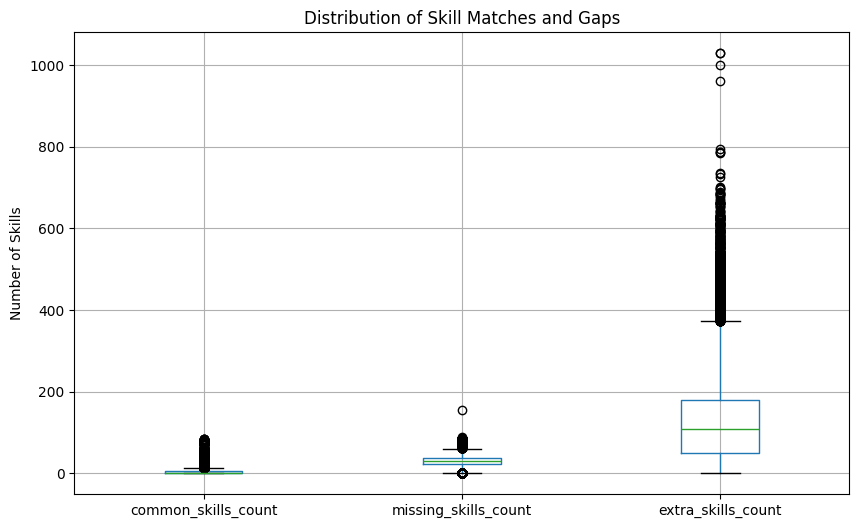

In [40]:
# Calculate skill gap metrics
skill_gaps = pd.DataFrame({
    'match_ratio': df['skill_comparison'].apply(lambda x: x['match_ratio']),
    'common_skills_count': df['skill_comparison'].apply(lambda x: len(x['common_skills'])),
    'missing_skills_count': df['skill_comparison'].apply(lambda x: len(x['missing_skills'])),
    'extra_skills_count': df['skill_comparison'].apply(lambda x: len(x['extra_skills']))
})

print("\nSkill Gap Analysis:")
print(skill_gaps.describe())

# Visualize skill gap distribution
plt.figure(figsize=(10, 6))
skill_gaps[['common_skills_count', 'missing_skills_count', 'extra_skills_count']].boxplot()
plt.title('Distribution of Skill Matches and Gaps')
plt.ylabel('Number of Skills')
plt.show()

In [19]:
# Calculate average skill gaps
skill_gap_stats = pd.DataFrame({
    'avg_common_skills': [df['skill_comparison'].apply(lambda x: len(x['common_skills'])).mean()],
    'avg_missing_skills': [df['skill_comparison'].apply(lambda x: len(x['missing_skills'])).mean()],
    'avg_extra_skills': [df['skill_comparison'].apply(lambda x: len(x['extra_skills'])).mean()]
})

# Most common missing skills
all_missing_skills = [skill for comp in df['skill_comparison'] 
                     for skill in comp['missing_skills']]
missing_skills_freq = pd.Series(all_missing_skills).value_counts().head(10)
print("\nSkill Gap Statistics:")
print(skill_gap_stats)
print("\nTop 10 Most Frequently Missing Skills:")
print(missing_skills_freq)


Skill Gap Statistics:
   avg_common_skills  avg_missing_skills  avg_extra_skills
0           4.365025           31.808242        127.722399

Top 10 Most Frequently Missing Skills:
entretenir des relations avec des clients                12735
activités de vente                                        9429
compréhension des produits                                9308
assurer le respect des exigences légales                  9295
trouver des solutions aux problèmes                       9199
aborder des problèmes avec un esprit critique             8983
gérer un planning de tâches                               8958
mettre en œuvre des stratégies de vente                   8930
stratégies de vente                                       8789
tenir des registres des interactions avec des clients     8660
Name: count, dtype: int64



=== Skill Gap Statistics ===


,Average Common Skills,Average Missing Skills,Average Extra Skills
0,4.37,31.81,127.72



=== Top 10 Most Frequently Missing Skills ===


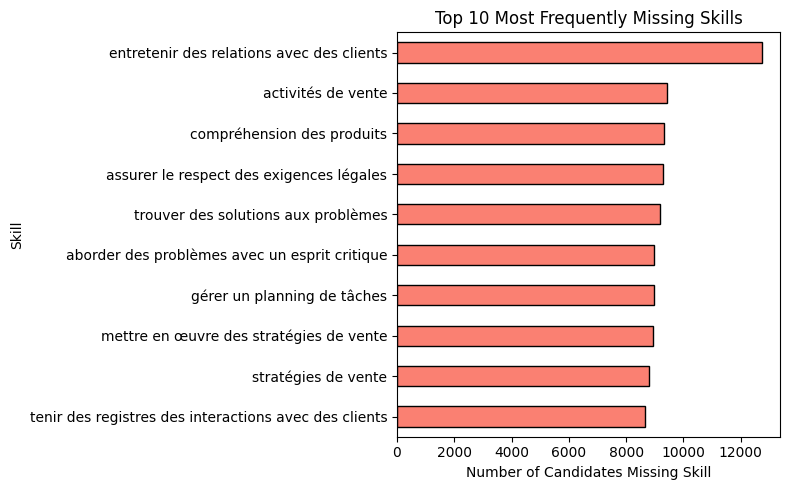

In [134]:
# Calculate average skill gaps
skill_gap_stats = pd.DataFrame({
    'Average Common Skills': [df['skill_comparison'].apply(lambda x: len(x['common_skills'])).mean()],
    'Average Missing Skills': [df['skill_comparison'].apply(lambda x: len(x['missing_skills'])).mean()],
    'Average Extra Skills': [df['skill_comparison'].apply(lambda x: len(x['extra_skills'])).mean()]
})

# Most common missing skills
all_missing_skills = [skill for comp in df['skill_comparison'] 
                     for skill in comp['missing_skills']]
missing_skills_freq = pd.Series(all_missing_skills).value_counts().head(10)

print("\n=== Skill Gap Statistics ===")
display(skill_gap_stats.style.format("{:.2f}"))

print("\n=== Top 10 Most Frequently Missing Skills ===")
plt.figure(figsize=(8, 5))
missing_skills_freq.sort_values().plot(kind='barh', color='salmon', edgecolor='black')
plt.title('Top 10 Most Frequently Missing Skills')
plt.xlabel('Number of Candidates Missing Skill')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

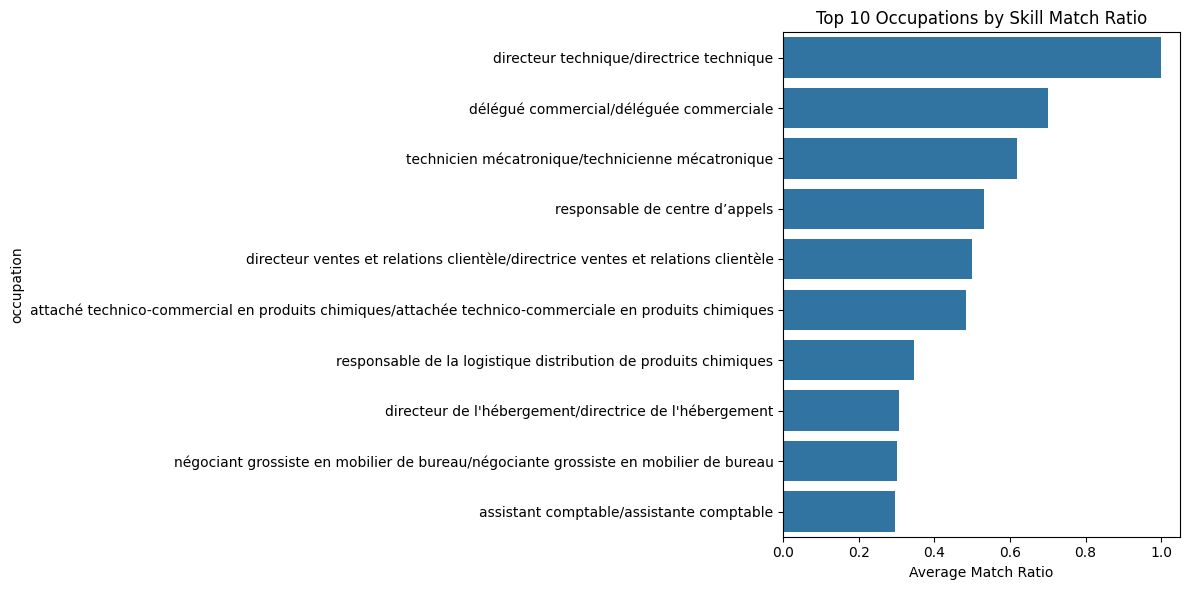

,occupation,avg_match_ratio,count
72,directeur technique/directrice technique,1.000000,1
76,délégué commercial/déléguée commerciale,0.701754,9
173,technicien mécatronique/technicienne mécatronique,0.619048,1
119,responsable de centre d’appels,0.532051,3
73,directeur ventes et relations clientèle/direct...,0.500000,1
...,...,...,...
108,opérateur sur machine de refoulage/opératrice ...,0.000000,2
135,responsable de l’innovation,0.000000,1
87,modiste chapelier/modiste chapelière,0.000000,3
39,chef de culture viticole,0.000000,3


In [24]:
# Analyze skill gaps by occupation
def analyze_occupation_skill_gaps():
    occupation_analysis = df.groupby('esco_title_vacancy').agg({
        'skill_comparison': lambda x: np.mean([item['match_ratio'] for item in x]),
        'label': 'count'
    }).reset_index()
    
    occupation_analysis.columns = ['occupation', 'avg_match_ratio', 'count']
    occupation_analysis = occupation_analysis.sort_values('avg_match_ratio', ascending=False)
    
    # Visualize results
    plt.figure(figsize=(12, 6))
    sns.barplot(data=occupation_analysis.head(10), x='avg_match_ratio', y='occupation')
    plt.title('Top 10 Occupations by Skill Match Ratio')
    plt.xlabel('Average Match Ratio')
    plt.tight_layout()
    plt.show()
    
    return occupation_analysis

analyze_occupation_skill_gaps()

In [29]:
# Get the occupation with 100% match ratio
perfect_matches = df.groupby('esco_title_vacancy').agg({
    'skill_comparison': lambda x: np.mean([item['match_ratio'] for item in x]),
    'label': 'count'
}).reset_index()

perfect_match_occupation = perfect_matches[perfect_matches['skill_comparison'] == 1.0]
print("\nOccupation with 100% match ratio:")
print(perfect_match_occupation)

# Examine the specific cases
perfect_cases = df[df['esco_title_vacancy'].isin(perfect_match_occupation['esco_title_vacancy'])]

# Look at the skills required vs provided
print("\nSkills analysis for 100% matches:")
for _, row in perfect_cases.iterrows():
    vacancy_skills = eval(row['vacancy_occupation_skills'])
    candidate_skills = eval(row['candidate_occupation_skills'])
    print(f"\nVacancy: {row['esco_title_vacancy']}")
    print(f"Number of required skills: {len(vacancy_skills)}")
    print(f"Number of candidate skills: {len(candidate_skills)}")
    candidate_skills = [skill['skill_label'] for skill in candidate_skills]
    vacancy_skills = [skill['skill_label'] for skill in vacancy_skills]
    print("Required skills:", vacancy_skills)
    print("Candidate skills:", candidate_skills)

# are all the required skills present in the candidate skills?
all_skills_present = all(skill in candidate_skills for skill in vacancy_skills)
if all_skills_present:
    print("All required skills are present in the candidate skills.")
else:
    print("Some required skills are missing in the candidate skills.")


Occupation with 100% match ratio:
                          esco_title_vacancy  skill_comparison  label
72  directeur technique/directrice technique               1.0      1

Skills analysis for 100% matches:

Vacancy: directeur technique/directrice technique
Number of required skills: 10
Number of candidate skills: 126
Required skills: ['techniques théâtrales', 'organiser des répétitions', "rédiger une évaluation des risques sur la représentation d'une production artistique", 'assurer la coordination avec les services créatifs', 's’adapter aux exigences créatives d’artistes', 'négocier des questions de santé et de sécurité avec des tiers', 'adapter le travail des concepteurs à la salle de spectacle', 'promouvoir la santé et la sécurité', 'coordonner les équipes techniques dans des productions artistiques', 'rédiger des devis techniques']
Candidate skills: ["caractéristiques de l'interface roues-rails", 'capteurs', 'mécanique des trains', 'électricité', 'mécanique', 'rédiger des rappo

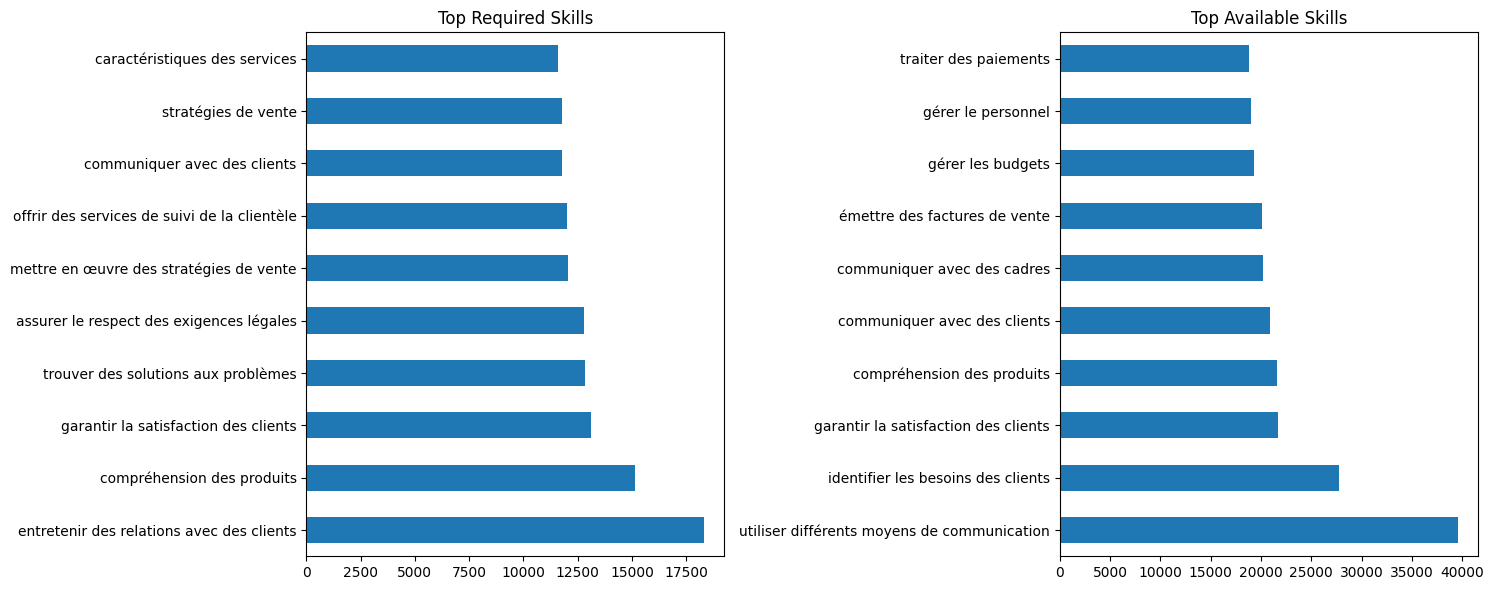

(entretenir des relations avec des clients       18340
 compréhension des produits                      15162
 garantir la satisfaction des clients            13131
 trouver des solutions aux problèmes             12856
 assurer le respect des exigences légales        12792
 mettre en œuvre des stratégies de vente         12053
 offrir des services de suivi de la clientèle    11998
 communiquer avec des clients                    11787
 stratégies de vente                             11781
 caractéristiques des services                   11609
 Name: count, dtype: int64,
 utiliser différents moyens de communication    39578
 identifier les besoins des clients             27756
 garantir la satisfaction des clients           21698
 compréhension des produits                     21542
 communiquer avec des clients                   20919
 communiquer avec des cadres                    20180
 émettre des factures de vente                  20066
 gérer les budgets                          

In [31]:
# Analyze most common required and available skills
def analyze_top_skills():
    # Most common required skills in vacancies
    vacancy_skills = []
    for skills_str in df['vacancy_occupation_skills']:
        try:
            skills = eval(skills_str) if pd.notna(skills_str) else []
            vacancy_skills.extend(skill['skill_label'] for skill in skills)
        except:
            continue
    
    # Most common candidate skills
    candidate_skills = []
    for skills_str in df['candidate_occupation_skills']:
        try:
            skills = eval(skills_str) if pd.notna(skills_str) else []
            candidate_skills.extend(skill['skill_label'] for skill in skills)
        except:
            continue
    
    top_required = pd.Series(vacancy_skills).value_counts().head(10)
    top_available = pd.Series(candidate_skills).value_counts().head(10)
    
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    top_required.plot(kind='barh', ax=ax1, title='Top Required Skills')
    top_available.plot(kind='barh', ax=ax2, title='Top Available Skills')
    
    plt.tight_layout()
    plt.show()
    
    return top_required, top_available

analyze_top_skills()

Text(0.5, 1.0, 'Top 5 Occupations')

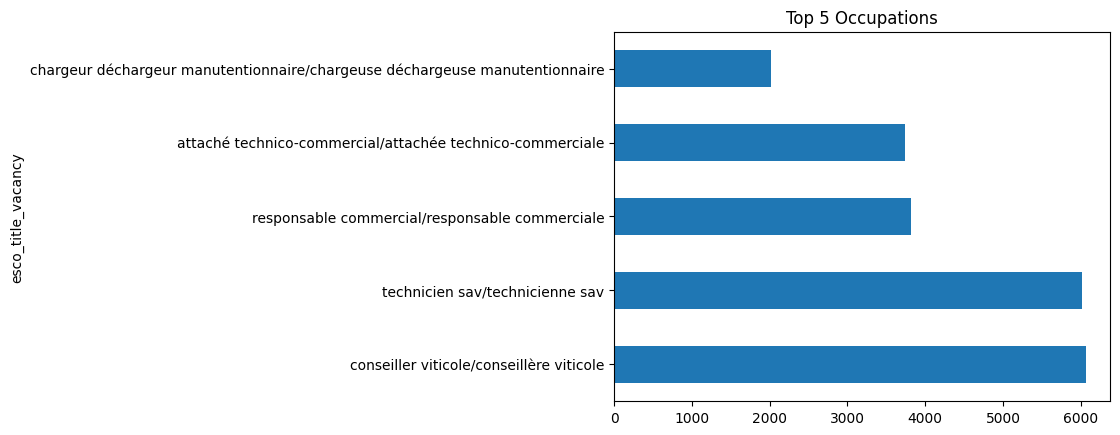

In [43]:
df['esco_title_vacancy'].value_counts().head(5).plot(kind='barh')
plt.title('Top 5 Occupations')

In [47]:
#top 3 missing skills for each candidate-vacancy pair
df['top_missing_skills'] = df['skill_comparison'].apply(
    lambda x: list(x['missing_skills'])[:3] if x['missing_skills'] else []
)
df[['candidate_text', 'esco_title_vacancy', 'top_missing_skills']].head()

,candidate_text,esco_title_vacancy,top_missing_skills
0,DELEPLANQUE Aurele COMPETENCES Capacité d’anal...,agent d’information de centre de contact clien...,"[établir un lien avec les clients, caractérist..."
1,ALBICE Yohann 2 rue d'Alembert 93000 BOBIGNY 2...,technicien en filature/technicienne en filature,[transformer des fibres textiles en ruban d'ét...
2,CONDUCTEUR DÉMONSTRATEUR PL CONTACT 553 CHEMIN...,conseiller viticole/conseillère viticole,"[promouvoir la durabilité, donner des conseils..."
3,Fabrice Tallon Neuilly-sous-Clermont (60) 6060...,technicien sav/technicienne sav,[réaliser des activités de service après-vente...
4,Sion Sébastien 15 avenue Mozart 83520 Roquebru...,sommelier en chef /sommelière en chef,"[préparer des listes de vins, servir des vins,..."


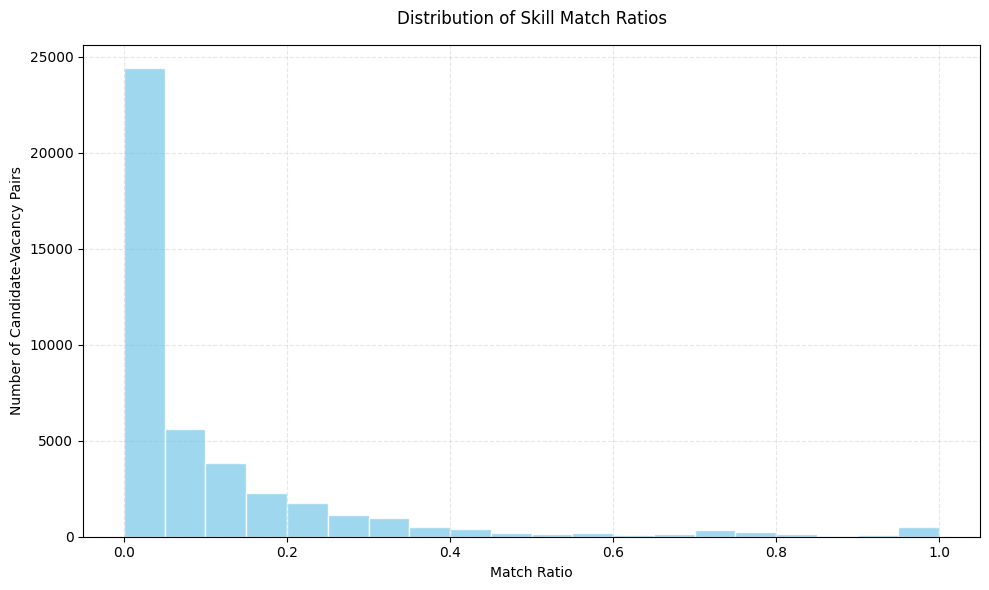

In [133]:
plt.figure(figsize=(10, 6))

# Create histogram with customized style
plt.hist(df['skill_comparison'].apply(lambda x: x['match_ratio']), 
         bins=20, 
         color='skyblue',
         edgecolor='white',
         alpha=0.8)

# Customize the plot
plt.title('Distribution of Skill Match Ratios', fontsize=12, pad=15)
plt.xlabel('Match Ratio', fontsize=10)
plt.ylabel('Number of Candidate-Vacancy Pairs', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Customize the layout
plt.tight_layout()

plt.show()

In [50]:
# Find bottom 10 occupations by avg match ratio
occupation_stats = df.groupby('esco_title_vacancy')['skill_comparison'].apply(
    lambda x: np.mean([item['match_ratio'] for item in x])
).sort_values().head(10)

for occupation in occupation_stats.index:
    missing = [skill for comp in df[df['esco_title_vacancy'] == occupation]['skill_comparison'] for skill in comp['missing_skills']]
    print(f"\nOccupation: {occupation}")
    print(pd.Series(missing).value_counts().head(5))


Occupation: monteur de courroies trapézoïdales/monteuse de courroies trapézoïdales
réparer les défauts de moules                                     3
placer des courroies trapézoïdales sur une machine d’encochage    3
utiliser une machine à guiper pour courroie trapézoïdale          3
construire des moules                                             3
tendre des courroies                                              3
Name: count, dtype: int64

Occupation: modiste chapelier/modiste chapelière
dessiner des vêtements                                                        3
utiliser des techniques textiles pour des produits confectionnés à la main    3
utiliser des techniques de couture à la main                                  3
décorer des articles textiles                                                 3
histoire de la mode                                                           3
Name: count, dtype: int64

Occupation: chef d’équipe en production horticole/cheffe d’équipe en prod

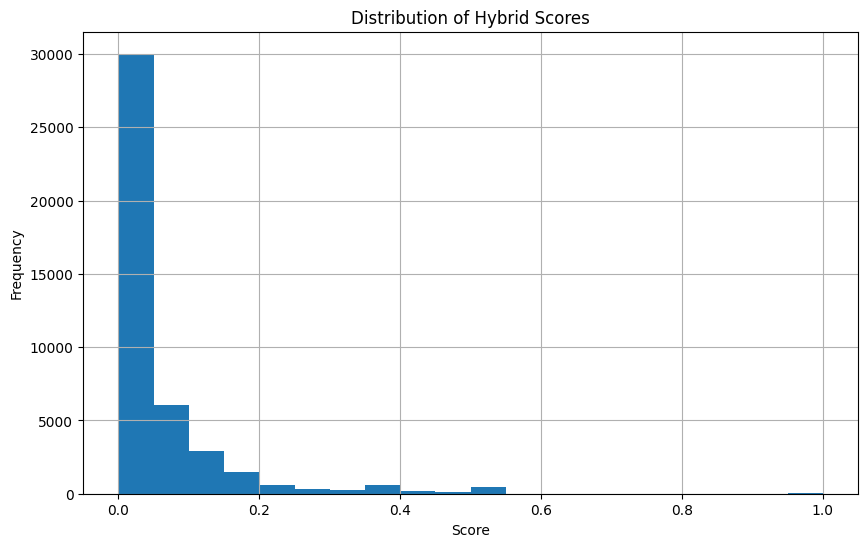


Top 5 Candidate-Vacancy Pairs by Hybrid Score:
                                         candidate_text  \
1502  Alexandre Bergeron Magasinier vendeur logistic...   
5989  Frédéric Mainas Technico-commercial Neaux (42)...   
7548  Loïc Martins Feyzin (69) 69320 +33 6 98 07 75 ...   
8025  MounyaLAGAAIRI Etudiante en master 2 Managemen...   
8030  Stéphane BRISSON Roullet saint estephe 16440 ....   

                                     esco_title_vacancy  hybrid_score  
1502                                      chef de rayon           1.0  
5989                                      chef de rayon           1.0  
7548  chargeur déchargeur manutentionnaire/chargeuse...           1.0  
8025         responsable des transports et déplacements           1.0  
8030  chargeur déchargeur manutentionnaire/chargeuse...           1.0  


In [90]:
# First, let's implement the hybrid scoring system
def calculate_candidate_score(row):
    try:
        skill_match_weight = 0.5
        experience_weight = 0.5
        semantic_weight =0

        # Skill match score (from existing analysis)
        skill_score = row['skill_comparison']['match_ratio']

        # Experience match score
        vacancy_occupation = str(row['esco_title_vacancy']).lower()
        candidate_occupations = [occ.lower() for occ in str(row['esco_titles_candidates']).split(', ')]
        experience_score = 1.0 if vacancy_occupation in candidate_occupations else 0.0

        # We'll use the number of common skills as a semantic score
        common_skills = len(row['skill_comparison']['common_skills'])
        total_skills = len(eval(row['vacancy_occupation_skills']))
        semantic_score = common_skills / total_skills if total_skills > 0 else 0

        # Combined score
        total_score = (skill_match_weight * skill_score +
                      experience_weight * experience_score +
                      semantic_weight * semantic_score)

        return total_score
    except Exception as e:
        # Return 0 score in case of any errors
        return 0.0

# Add hybrid scores to dataframe
df['hybrid_score'] = df.apply(calculate_candidate_score, axis=1)

# Show distribution of hybrid scores
plt.figure(figsize=(10, 6))
df['hybrid_score'].hist(bins=20)
plt.title('Distribution of Hybrid Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Find top candidates
print("\nTop 5 Candidate-Vacancy Pairs by Hybrid Score:")
top_matches = df.nlargest(5, 'hybrid_score')[['candidate_text', 'esco_title_vacancy', 'hybrid_score']]
print(top_matches)

In [91]:
# Implement skill-based clustering
from sklearn.cluster import KMeans


def create_skill_vectors(df):
    # Get all unique skills
    all_skills = set()
    for skills in df['vacancy_occupation_skills']:
        skills_list = eval(skills) if isinstance(skills, str) else skills
        all_skills.update(s['skill_label'] for s in skills_list)
    
    # Create skill vectors
    skill_matrix = []
    for skills in df['vacancy_occupation_skills']:
        skills_list = eval(skills) if isinstance(skills, str) else skills
        current_skills = {s['skill_label'] for s in skills_list}
        vector = [1 if skill in current_skills else 0 for skill in all_skills]
        skill_matrix.append(vector)
    
    return np.array(skill_matrix), list(all_skills)

# Create skill vectors
skill_matrix, skill_features = create_skill_vectors(df)

# Perform clustering
n_clusters = 5  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['skill_cluster'] = kmeans.fit_predict(skill_matrix)

# Analyze clusters
print("\nSkill Cluster Analysis:")
for cluster in range(n_clusters):
    print(f"\nCluster {cluster}:")
    cluster_jobs = df[df['skill_cluster'] == cluster]['esco_title_vacancy'].value_counts().head(3)
    print("Top occupations:", cluster_jobs)


Skill Cluster Analysis:

Cluster 0:
Top occupations: esco_title_vacancy
conseiller viticole/conseillère viticole                                                      6073
responsable de l’approvisionnement en technologies de l’information et de la communication    1603
vendeur en bricolage/vendeuse en bricolage                                                    1536
Name: count, dtype: int64

Cluster 1:
Top occupations: esco_title_vacancy
responsable commercial/responsable commerciale    3812
directeur régional/directrice régionale            219
chef de département                                  1
Name: count, dtype: int64

Cluster 2:
Top occupations: esco_title_vacancy
technicien sav/technicienne sav    6019
Name: count, dtype: int64

Cluster 3:
Top occupations: esco_title_vacancy
chargeur déchargeur manutentionnaire/chargeuse déchargeuse manutentionnaire    2022
Name: count, dtype: int64

Cluster 4:
Top occupations: esco_title_vacancy
attaché technico-commercial/attachée technico

In [135]:
def analyze_and_rank_candidates(vacancy_id, df, top_n=10):
    """
    Analyze and rank candidates for a specific vacancy using the hybrid score,
    Returns: Top N candidates with their scores and skill analysis
    """
    # Get vacancy details
    vacancy = df[df['Id_vacancy'] == vacancy_id].iloc[0]
    
    # Get all candidates for this vacancy and filter out 0 scores
    candidates = df[df['Id_vacancy'] == vacancy_id].copy()
    candidates = candidates[candidates['hybrid_score'] > 0]
    
    # Sort by hybrid score
    top_candidates = candidates.nlargest(top_n, 'hybrid_score')
    
    # Create detailed analysis
    results = pd.DataFrame({
        'candidate_id': top_candidates['Id_candidate'],
        'score': top_candidates['hybrid_score'],
        'experience': top_candidates['esco_titles_candidates'],
        'number of common_skills': top_candidates['skill_comparison'].apply(lambda x: len(x['common_skills'])),
        'number of missing_skills': top_candidates['skill_comparison'].apply(lambda x: len(x['missing_skills'])),
        'number of extra_skills': top_candidates['skill_comparison'].apply(lambda x: len(x['extra_skills'])),
        'common skills': top_candidates['skill_comparison'].apply(lambda x: x['common_skills']),
        'missing_skills': top_candidates['skill_comparison'].apply(lambda x: list(x['missing_skills'])),
        'extra_skills': top_candidates['skill_comparison'].apply(lambda x: list(x['extra_skills'])),
        'label': top_candidates['label']
    })


    return results


vacancy_id = df['Id_vacancy'].iloc[100]  # Example vacancy
results = analyze_and_rank_candidates(vacancy_id, df)
print(f"Detailed Candidate Rankings for vacancy {vacancy_id}")
results

Detailed Candidate Rankings for vacancy 12143


,candidate_id,score,experience,number of common_skills,number of missing_skills,number of extra_skills,common skills,missing_skills,extra_skills,label
29126,387546,0.366071,"commercial, commercial, commercial, commercial...",41,15,98,"{prix du marché, produire des rapports de vent...","[activités économiques en ligne, activités de ...","[procéder à l'analyse des ventes, élaborer des...",0
32947,391471,0.366071,"retoucheur-vendeur, serveur, commercial, vendeur",41,15,104,"{prix du marché, produire des rapports de vent...","[activités économiques en ligne, activités de ...","[procéder à l'analyse des ventes, élaborer des...",0
18208,415270,0.187500,"directrice artistique, directrice artistique, ...",21,35,261,"{produire des rapports de vente, activités de ...","[prix du marché, techniques de promotion des v...","[gérer la logistique, analyser la relation ent...",0
4364,420667,0.178571,"assistante de vente, assistante de vente, agen...",20,36,422,"{trouver des solutions aux problèmes, compréhe...","[prix du marché, produire des rapports de vent...","[principes de gestion de projet, informer des ...",1
17488,412824,0.160714,"responsable service clients, productrice de mu...",18,38,225,"{mettre en œuvre des stratégies de marketing, ...","[prix du marché, techniques de promotion des v...","[créer un réseau professionnel, commandes d'un...",0
36751,402607,0.151786,"ingénieur technico-commercial, vendeur, ""juris...",17,39,229,"{mettre en œuvre des stratégies de marketing, ...","[prix du marché, produire des rapports de vent...",[informer des conducteurs sur des itinéraires ...,0
16993,410335,0.142857,"commerçant indépendant, animateur, chargé de p...",16,40,89,"{prix du marché, mettre en œuvre des stratégie...","[produire des rapports de vente, activités de ...",[comprendre la terminologie des affaires finan...,0
17415,412513,0.133929,"téléopérateur, responsable de formation, respo...",15,41,217,"{paiements par carte de crédit, contacter des ...","[prix du marché, produire des rapports de vent...","[créer un réseau professionnel, préparer des a...",0
29351,388357,0.133929,"opérateur sur raboteuse, conseiller, pareuse p...",15,41,144,"{compréhension des produits, entretenir des re...","[prix du marché, produire des rapports de vent...","[remplir des rayons, polir des surfaces irrégu...",0
37044,404383,0.116071,"constructeur de maisons individuelles, mandata...",13,43,192,"{compréhension des produits, techniques de pro...","[prix du marché, produire des rapports de vent...","[appliquer une couverture en rouleau, remplir ...",0


In [126]:
df[['vacancy_text', 'esco_title_vacancy', 'vacancy_occupation_skills']][df['Id_vacancy'] == 12143].drop_duplicates()

,vacancy_text,esco_title_vacancy,vacancy_occupation_skills
100,Titre: Conseiller Technico-Commercial (H/F) - ...,attaché technico-commercial/attachée technico-...,[{'skill_label': 'caractéristiques des produit...


In [127]:
df['vacancy_occupation_skills'][7]

'[{\'skill_label\': "principes de gestion d\'entreprise", \'skill_type\': \'knowledge\', \'relation_type\': \'essential\'}, {\'skill_label\': \'droit des affaires\', \'skill_type\': \'knowledge\', \'relation_type\': \'essential\'}, {\'skill_label\': \'prévision financière\', \'skill_type\': \'knowledge\', \'relation_type\': \'essential\'}, {\'skill_label\': \'responsabilité sociale des entreprises\', \'skill_type\': \'knowledge\', \'relation_type\': \'essential\'}, {\'skill_label\': \'gestion des coûts\', \'skill_type\': \'knowledge\', \'relation_type\': \'essential\'}, {\'skill_label\': \'recensement des risques\', \'skill_type\': \'knowledge\', \'relation_type\': \'essential\'}, {\'skill_label\': \'planning stratégique\', \'skill_type\': \'knowledge\', \'relation_type\': \'essential\'}, {\'skill_label\': \'communication des entreprises\', \'skill_type\': \'knowledge\', \'relation_type\': \'essential\'}, {\'skill_label\': "politiques d\'entreprise", \'skill_type\': \'knowledge\', \'re

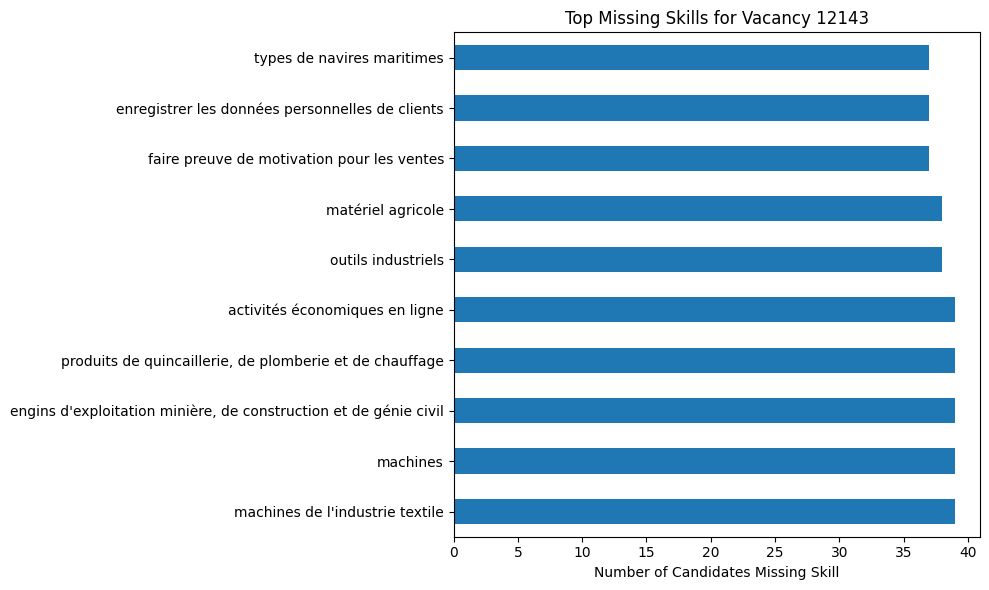

In [129]:
def analyze_skill_gaps_for_vacancy(vacancy_id, df):
    # Get candidates for this vacancy
    vacancy_candidates = df[df['Id_vacancy'] == vacancy_id]
    
    # Aggregate missing skills
    all_missing_skills = []
    for comp in vacancy_candidates['skill_comparison']:
        all_missing_skills.extend(comp['missing_skills'])
    
    # Plot top missing skills
    plt.figure(figsize=(10, 6))
    pd.Series(all_missing_skills).value_counts().head(10).plot(kind='barh')
    plt.title(f'Top Missing Skills for Vacancy {vacancy_id}')
    plt.xlabel('Number of Candidates Missing Skill')
    plt.tight_layout()
    plt.show()

analyze_skill_gaps_for_vacancy(12143, df)

In [18]:
def create_candidate_text(esco_titles, skills_str):
    """Create French text for candidate experience and skills"""
    try:
        # Parse skills from string
        skills_list = eval(skills_str) if pd.notna(skills_str) else []
        skills_text = ", ".join([skill['skill_label'] for skill in skills_list])
        
        # Create French text
        text = f"J'ai travaillé dans les domaines suivants : {esco_titles}. "
        if skills_text:
            text += f"Je possède les compétences suivantes : {skills_text}."
        return text
    except:
        return esco_titles

def create_vacancy_text(esco_title, skills_str):
    """Create French text for vacancy requirements"""
    try:
        # Parse skills from string
        skills_list = eval(skills_str) if pd.notna(skills_str) else []
        skills_text = ", ".join([skill['skill_label'] for skill in skills_list])
        
        # Create French text
        text = f"Le poste recherché est : {esco_title}. "
        if skills_text:
            text += f"Les compétences requises sont : {skills_text}."
        return text
    except:
        return esco_title

# Create the sentence pairs
df['sentence1'] = df.apply(
    lambda row: create_candidate_text(
        row['esco_titles_candidates'], 
        row['candidate_occupation_skills']
    ), 
    axis=1
)

df['sentence2'] = df.apply(
    lambda row: create_vacancy_text(
        row['esco_title_vacancy'], 
        row['vacancy_occupation_skills']
    ), 
    axis=1
)

# Create final dataset for training
sentence_pairs = df[['sentence1', 'sentence2', 'combined_score']].copy()

# Print example to verify format
print("Example Pair:")
print("\nCandidate (sentence1):")
print(sentence_pairs['sentence1'].iloc[0])
print("\nVacancy (sentence2):")
print(sentence_pairs['sentence2'].iloc[0])

Example Pair:

Candidate (sentence1):
J'ai travaillé dans les domaines suivants : responsable des transports et des infrastructures. Je possède les compétences suivantes : politique environnementale, droit de l’urbanisme, législation environnementale, itinéraires géographiques, statistiques, urbanisme, logiciel de système d'analyse statistique, ingénierie de la circulation, droit public, définir des modèles statistiques, réaliser des études sur les transports urbains, interpréter des éléments de culture visuelle, appliquer des techniques d’analyse statistique, promouvoir l’utilisation de transports durables, analyser les coûts de transport, analyser des données sur l’environnement, analyser des données de tests, réglementer la circulation, analyser la configuration du trafic routier, mener des études environnementales, étudier les flux de circulation, analyser des études sur les transports, analyser des réseaux d’entreprises de transport, préparer des graphiques de données, communiquer

In [ ]:
import json
json_data = df[['sentence1', 'sentence2', 'gender_number', 'label']].to_dict(orient='records')


with open('data_with_escotitles_and_skills.json', 'w', encoding='utf-8') as f:
    json.dump(json_data, f, ensure_ascii=False, indent=4)


# initially we were using json datasets to evaluate sentence transformers, that is why. 